# ***CROWNFUNDING ANALYSIS***

### Using kiva.org dataset

Berikut keterangan

📌 Tentang Kiva

kiva.org adalah sebuah platform online non-profit untuk crowdfunding yang memungkinkan individu dapat meminjam dana untuk keperluan bisnis. Misinya adalah untuk meningkatkan kesejahteraan warga marginal (terutama low-income entrepreneurs and students) di beberapa negara. Crowdfunding (urun dana) adalah aktivitas pengumpulan dana modal dari beberapa individu untuk membiayai usaha bisnis baru.

💁 Role play: 

Saat ini Anda diminta untuk menganalisa data kiva ini karena perusahaan Anda ingin masuk sebagai pendana pada kiva ini. Perusahaan Anda berada di Indonesia dan atasan Anda ingin tau kesempatan apa yang bisa diberikan kepada Kiva dan mengetahui resikonya untuk menjadi pendana seperti apa.

Silahkan analisis sesuai dengan perspektif masing-masing, boleh dilihat berdasarkan regionnya, total fundingnya terendah maupun terbesar, sector, activity, dll.

Deskripsi kolom: 

-	 `id`: Unique ID untuk masing-masing loan (loan ID)
-	 `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
-	 `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
        Keterangan tambahan:
        -  loan_amount adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
        -  funded_amount biasanya sama atau lebih kecil dari loan_amount:
●	Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.
●	Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.

-	 `activity`: Kategori lebih spesifik dari `sector`
-	 `sector`: Kategori dari loan
-	 `country`: Nama negara lengkap, tempat pinjaman dicairkan
-	`region`: Nama wilayah lengkap dari `country`
-	`currency`: Mata uang
-	`partner_id`: ID untuk organisasi partner
-	`posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
-	`funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
-	`term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
-	`lender_count`: Banyaknya peminjam yang berkontribusi
-	`repayment_interval`: Cara pelunasan peminjaman



## **Pertanyaan Analisis:**
1. Negara ASEAN mana yang memiliki funding ratio tertinggi?
2. Sektor apa yang paling dominan di negara tersebut?
3. Aktivitas apa yang paling umum dilakukan dalam sektor tersebut?
4. Bagaimana distribusi funding ratio di negara-negara ASEAN?

## **Tujuan Analisis:**
- Mengidentifikasi negara ASEAN dengan tingkat keberhasilan pendanaan tertinggi.
- Menentukan sektor dan aktivitas yang paling menarik untuk investasi.
- Memberikan insight bagi calon investor untuk memahami peluang dan risiko pendanaan di Kiva.
"""

# ***CODE*** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Column ditampilkan semua
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
# Off scientic notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df = pd.read_csv('kiva_loan.csv')
df.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly
5,1080148,250.00,250.00,Services,Services,purchase leather for my business using ksh 20000.,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-29 14:14:57+00:00,4.00,6,irregular
6,653067,200.00,200.00,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.00,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.00,8,bullet
7,653078,400.00,400.00,Beauty Salon,Services,to buy more hair and skin care products.,Pakistan,Ellahabad,PKR,245.00,2014-01-01 11:46:01+00:00,2014-01-10 18:18:44+00:00,14.00,8,monthly
8,653082,475.00,475.00,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",Pakistan,Lahore,PKR,245.00,2014-01-01 11:49:43+00:00,2014-01-01 18:47:21+00:00,14.00,19,monthly
9,653048,625.00,625.00,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",Pakistan,Lahore,PKR,247.00,2014-01-01 05:41:03+00:00,2014-01-03 15:45:04+00:00,11.00,24,irregular


## **Data Understanding**

In [7]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), i

In [9]:
print("statistik Deskriptif")
df.drop(columns= ['id', 'partner_id']).describe(include=['int64', 'float64'])

statistik Deskriptif


,funded_amount,loan_amount,term_in_months,lender_count
count,671205.00,671205.00,671205.00,671205.00
mean,786.00,842.40,13.74,20.59
std,1130.40,1198.66,8.60,28.46
min,0.00,25.00,1.00,0.00
25%,250.00,275.00,8.00,7.00
50%,450.00,500.00,13.00,13.00
75%,900.00,1000.00,14.00,24.00
max,100000.00,100000.00,158.00,2986.00


In [21]:
print("Cek Missing Value")
print(df.isnull().sum())

Cek Missing Value
id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64


## **Data Cleansing**

- Use : drop
- region : unknown
- partner id : drop

In [5]:
df_cleaned = df.drop(columns=['use', 'partner_id'], errors='ignore')
df_cleaned['region'] = df_cleaned['region'].fillna('Unknown')

print(df_cleaned.isnull().sum())

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
region                    0
currency                  0
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64


In [6]:
df['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [27]:
category_columns = ['country', 'currency', 'sector', 'activity', 'region', 'repayment_interval']
df_cleaned[category_columns] = df_cleaned[category_columns].astype('category')
df_cleaned.dtypes

id                       int64
funded_amount          float64
loan_amount            float64
activity              category
sector                category
country               category
region                category
currency              category
posted_time             object
funded_time             object
term_in_months         float64
lender_count             int64
repayment_interval    category
dtype: object

## **Data Analytics**

In [41]:
df['country'].value_counts().head(10)

country
Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Peru            22233
Colombia        21995
Uganda          20601
Tajikistan      19580
Ecuador         13521
Name: count, dtype: int64

In [ ]:
df_cleaned["posted_time"] = pd.to_datetime(df["posted_time"])
df_cleaned["funded_time"] = pd.to_datetime(df["funded_time"])

df_cleaned["time_to_fund"] = (df_cleaned["funded_time"] - df_cleaned["posted_time"]).dt.total_seconds() / 3600

df_cleaned[["posted_time", "funded_time", "time_to_fund"]].head()

,posted_time,funded_time,time_to_fund
0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,27.90
1,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,26.44
2,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,6.06
3,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,4.95
4,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,7.43


In [ ]:
# asean_countries = ['Indonesia', 'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Singapore']
# df_asean = df_cleaned[df_cleaned['country'].isin(asean_countries)]
# df_asean.head()

,id,funded_amount,loan_amount,activity,sector,country,region,currency,posted_time,funded_time,term_in_months,lender_count,repayment_interval,funding_ratio
51,653092,175.00,175.00,Pigs,Agriculture,Philippines,Liloy-Dela Paz,PHP,2014-01-02 00:25:40+00:00,2014-01-02 01:42:51+00:00,8.00,6,irregular,1.00
52,653149,175.00,175.00,Pigs,Agriculture,Philippines,"Tanjay, Negros Oriental",PHP,2014-01-02 04:18:30+00:00,2014-01-02 07:47:28+00:00,8.00,7,irregular,1.00
55,653123,700.00,700.00,General Store,Retail,Philippines,"Brookes Point, Palawan",PHP,2014-01-02 02:18:02+00:00,2014-01-02 03:26:10+00:00,5.00,2,irregular,1.00
56,653338,575.00,575.00,Farming,Agriculture,Philippines,"Tanjay, Negros Oriental",PHP,2014-01-02 13:38:42+00:00,2014-01-02 23:01:23+00:00,8.00,19,irregular,1.00
60,653192,800.00,800.00,Pigs,Agriculture,Cambodia,Takeo province,USD,2014-01-02 07:13:49+00:00,2014-01-02 17:50:16+00:00,12.00,32,monthly,1.00


In [ ]:
columns = ["funded_amount", "loan_amount"]

Q1 = df_cleaned[columns].quantile(0.25)
Q3 = df_cleaned[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[~((df_cleaned[columns] < lower_bound) | (df_cleaned[columns] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {len(df_cleaned)}")

Jumlah data setelah menghapus outlier: 611398


## **Data Visualization**

### Distribusi jumlah pinjaman dan perbedaannya antara funded_amount dan loan_amount.

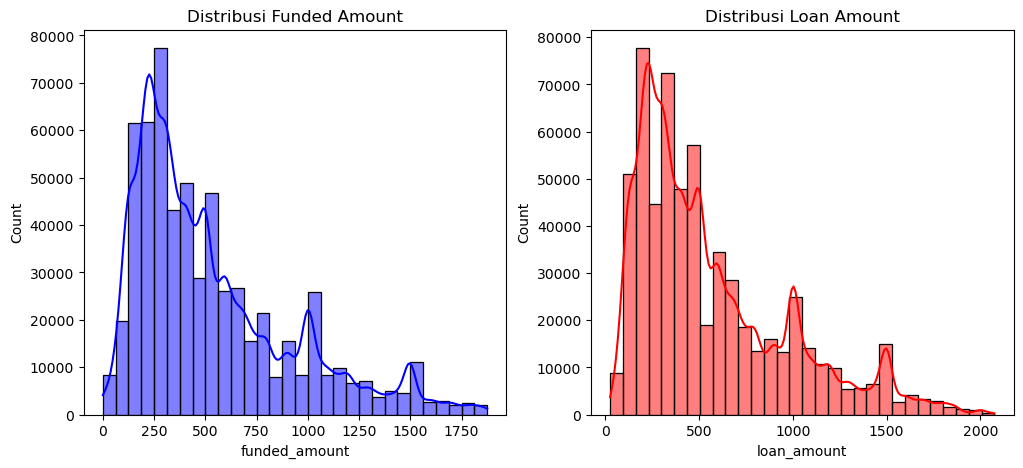

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned["funded_amount"], bins=30, kde=True, color="blue")
plt.title("Distribusi Funded Amount")

plt.subplot(1,2,2)
sns.histplot(df_cleaned["loan_amount"], bins=30, kde=True, color="red")
plt.title("Distribusi Loan Amount")

plt.show()

## Sektor dan aktivitas usaha yang paling banyak mendapatkan pinjaman.

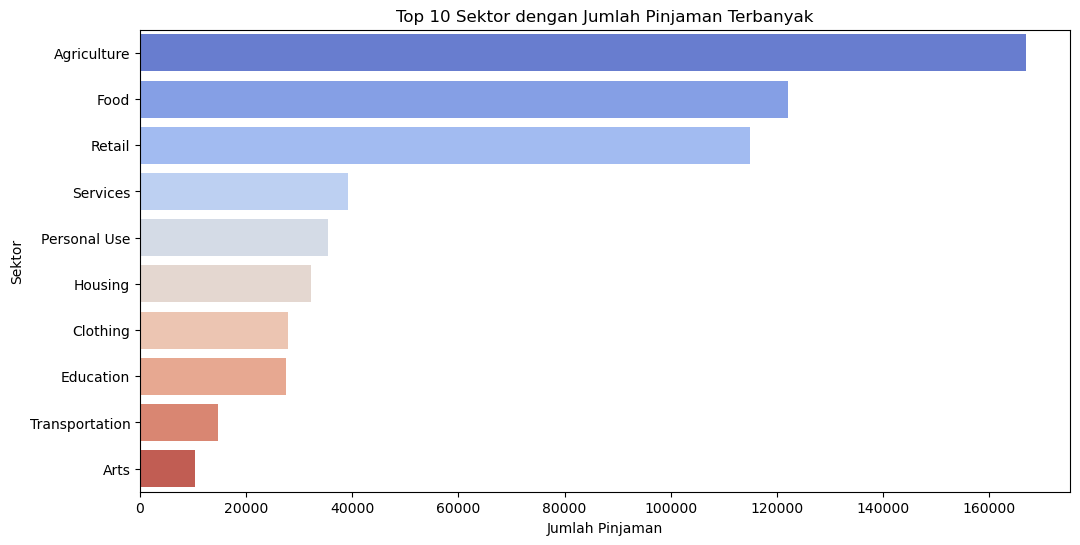

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(y=df_cleaned["sector"], order=df_cleaned["sector"].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Sektor dengan Jumlah Pinjaman Terbanyak")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Sektor")
plt.show()

## Negara dengan jumlah pinjaman terbanyak dan rata-rata pinjaman tertinggi.

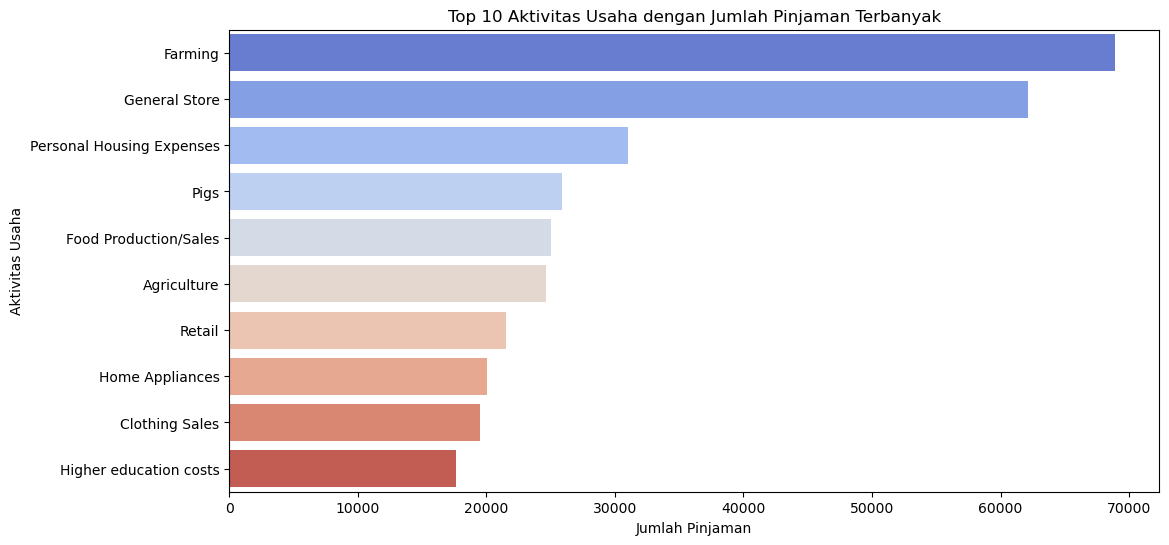

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y=df_cleaned["activity"], order=df_cleaned["activity"].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Aktivitas Usaha dengan Jumlah Pinjaman Terbanyak")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Aktivitas Usaha")
plt.show()

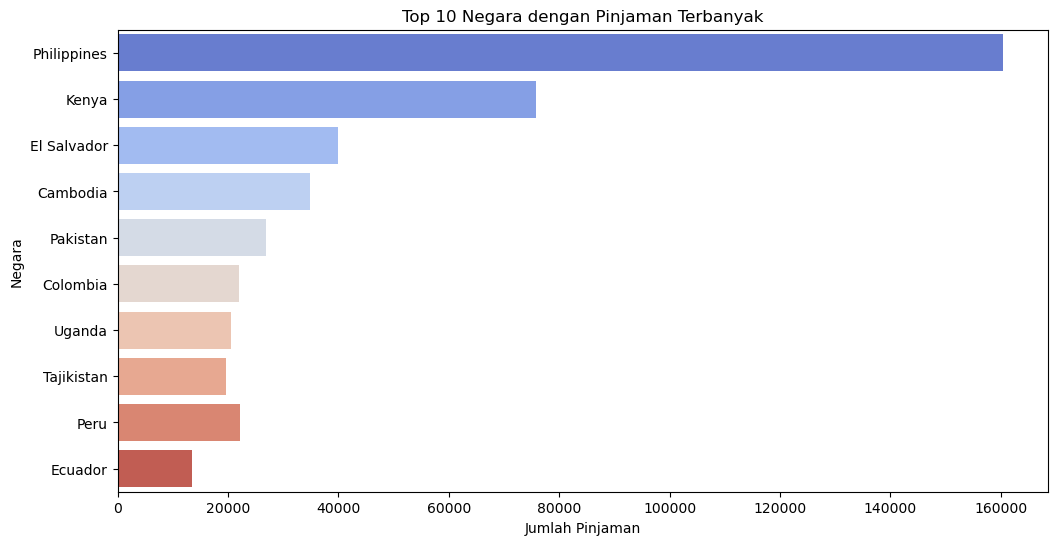

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(y=df["country"], order=df_cleaned["country"].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Negara dengan Pinjaman Terbanyak")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Negara")
plt.show()

## Cara pembayaran yang paling umum digunakan.

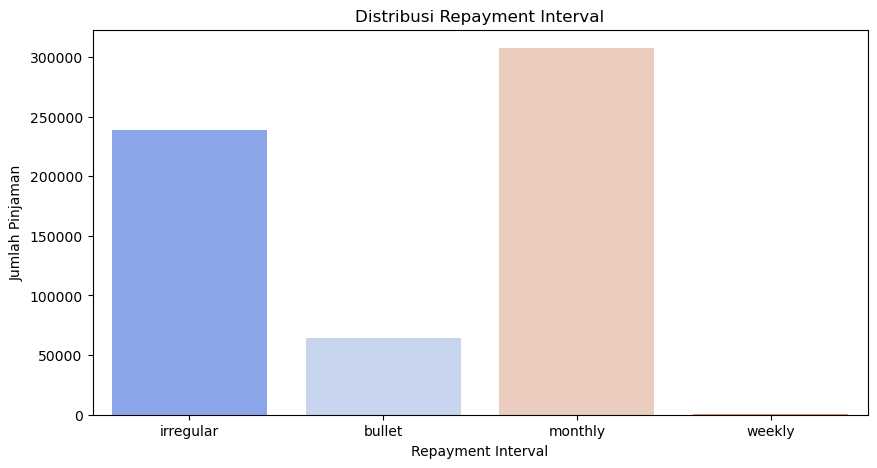

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_cleaned["repayment_interval"], palette="coolwarm")
plt.title("Distribusi Repayment Interval")
plt.xlabel("Repayment Interval")
plt.ylabel("Jumlah Pinjaman")
plt.show()

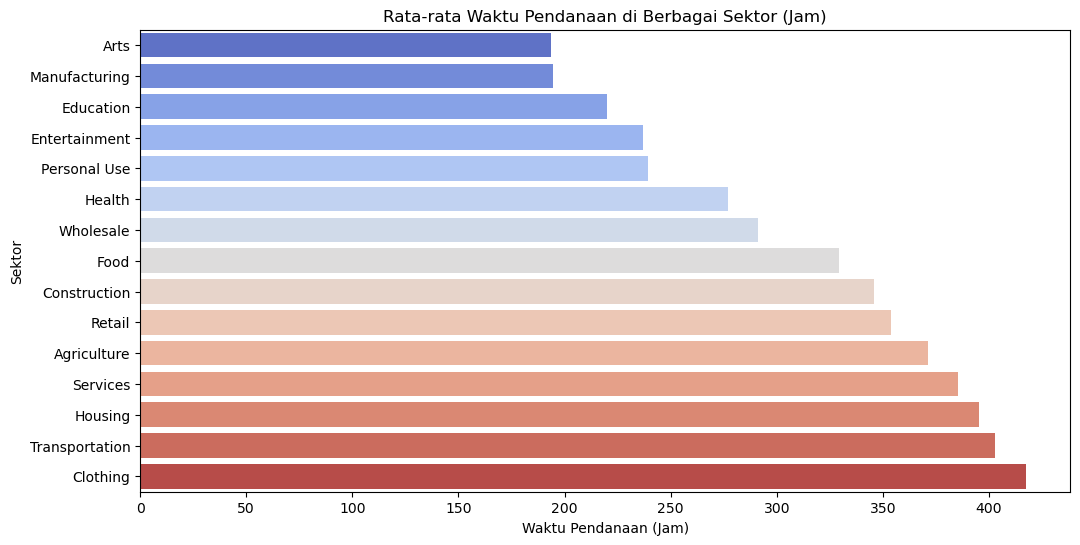

In [ ]:
sector_funding_time = df_cleaned.groupby("sector")["time_to_fund"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding_time.values, y=sector_funding_time.index, palette="coolwarm")
plt.title("Rata-rata Waktu Pendanaan di Berbagai Sektor (Jam)")
plt.xlabel("Waktu Pendanaan (Jam)")
plt.ylabel("Sektor")
plt.show()

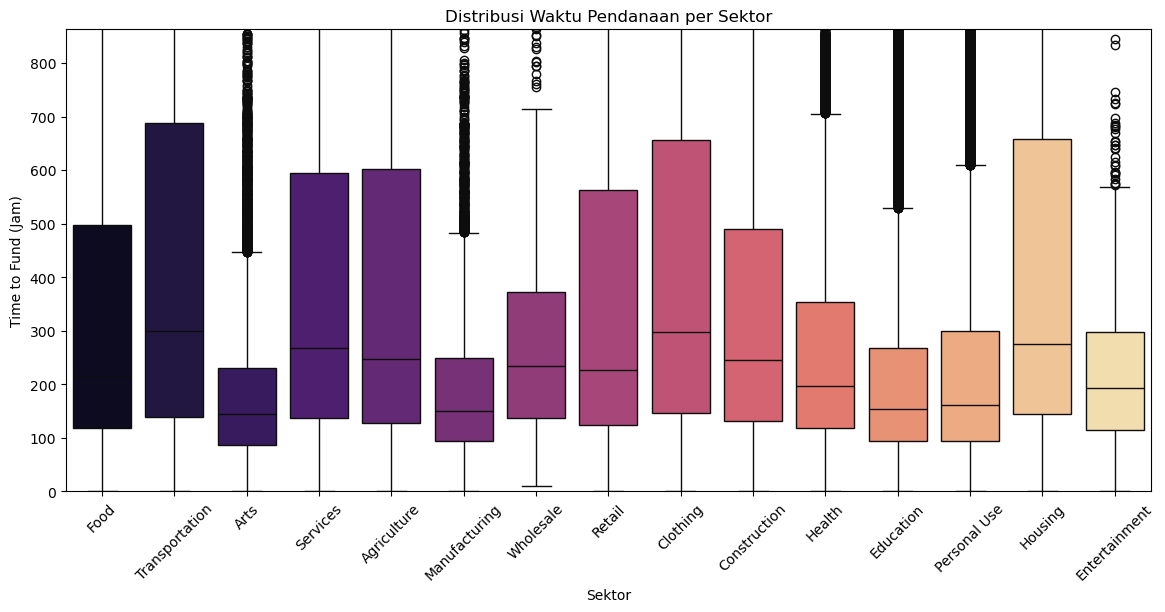

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(x="sector", y="time_to_fund", data=df_cleaned, palette="magma")
plt.xticks(rotation=45)
plt.ylim(0, df_cleaned["time_to_fund"].quantile(0.95))  # Batasi hingga kuantil 95% agar tidak terlalu terkompres
plt.title("Distribusi Waktu Pendanaan per Sektor")
plt.xlabel("Sektor")
plt.ylabel("Time to Fund (Jam)")
plt.show()


# Kesimpulan
- Sektor dengan waktu pendanaan paling cepat bisa dianalisis lebih dalam → Apa yang membuat sektor ini menarik bagi pendana?
- Sektor yang membutuhkan waktu lebih lama bisa diperbaiki strateginya, misalnya dengan menurunkan jumlah pinjaman, meningkatkan transparansi, atau menargetkan investor yang tepat.
